<a href="https://colab.research.google.com/github/ValentineAlibert/Data-physics/blob/master/ML_MNIST_NN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf


In [0]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



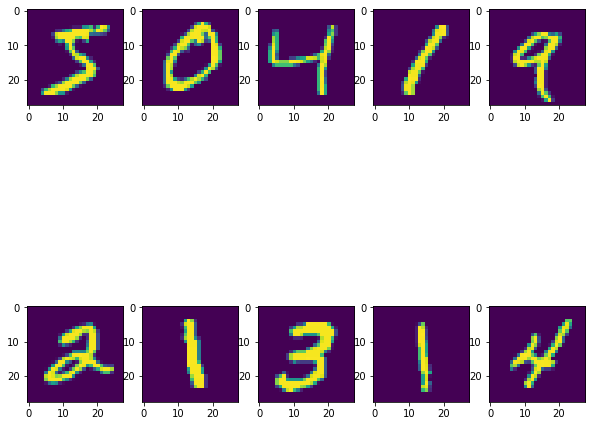

In [0]:
# Investigate the data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mping

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images


w = 10 #width
h = 10 #height
fig = plt.figure(figsize=(h, w))  
columns = 5 
rows = 2
j = 0 # setting variable for iteration over numbers

for i in range(1, columns*rows +1): #+1 
    img = np.random.randint(10, size=(h,w)) #new image 
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[j]) 
    j = j+1 #go through data "numbers" - with images

plt.show()

### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
### END STUDENT CODE ###

In [0]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

model.add(Dense(65,activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output.
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.
### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 65)                51025     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                660       
Total params: 51,685
Trainable params: 51,685
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'], loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)

### --> Call model.compile with the right arguments.
### END STUDENT CODE ###

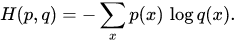

In [0]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

### STUDENT CODE HERE ###
model.predict_proba(x_train)
### --> call model.predict_proba() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
### END STUDENT CODE ###


Test loss: 2.84
Test accuracy: 0.121


array([[0.09824143, 0.02083364, 0.15171011, ..., 0.3639296 , 0.00595385,
        0.135595  ],
       [0.13993326, 0.03170397, 0.10471863, ..., 0.06841765, 0.00895923,
        0.13971196],
       [0.09984408, 0.05520745, 0.12408692, ..., 0.3209779 , 0.01743547,
        0.14879125],
       ...,
       [0.08765382, 0.0458182 , 0.0892097 , ..., 0.33139148, 0.01821724,
        0.2456214 ],
       [0.10352389, 0.02007703, 0.03954683, ..., 0.02439176, 0.01307277,
        0.07107545],
       [0.06375705, 0.02520508, 0.124909  , ..., 0.07583275, 0.00393716,
        0.16015323]], dtype=float32)

In [0]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 10000
EPOCHS = 100

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1000
54000/54000 [==============================] - 1s 13us/step - loss: 2.7167 - acc: 0.1289 - val_loss: 2.5182 - val_acc: 0.1537
Epoch 2/1000
54000/54000 [==============================] - 1s 10us/step - loss: 2.4181 - acc: 0.1761 - val_loss: 2.2768 - val_acc: 0.2068
Epoch 3/1000
54000/54000 [==============================] - 0s 9us/step - loss: 2.2146 - acc: 0.2306 - val_loss: 2.1149 - val_acc: 0.2630
Epoch 4/1000
54000/54000 [==============================] - 0s 9us/step - loss: 2.0746 - acc: 0.2880 - val_loss: 1.9973 - val_acc: 0.3257
Epoch 5/1000
54000/54000 [==============================] - 0s 9us/step - loss: 1.9703 - acc: 0.3395 - val_loss: 1.9031 - val_acc: 0.3743
Epoch 6/1000
54000/54000 [==============================] - 0s 9us/step - loss: 1.8865 - acc: 0.3818 - val_loss: 1.8256 - val_acc: 0.4148
Epoch 7/1000
54000/54000 [==============================] - 1s 10us/step - loss: 1.8145 - acc: 0.4189 - val_loss: 1.7570 

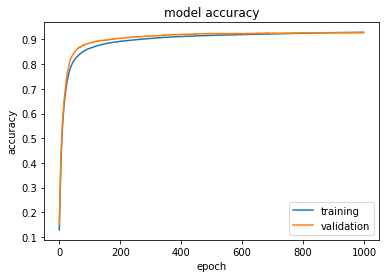

In [0]:
# Plot the progression of the training process

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Test loss: 0.313
Test accuracy: 0.91


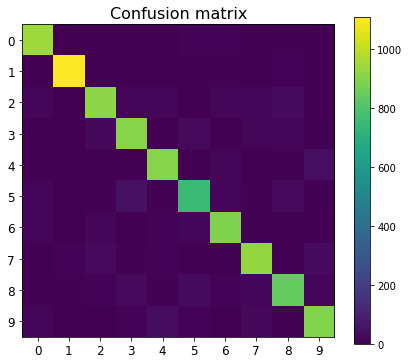

In [0]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_index ))
plt.xticks(np.arange(10), np.arange(10), rotation=0, fontsize=12)
plt.yticks(np.arange(10), np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
### END STUDENT CODE ###

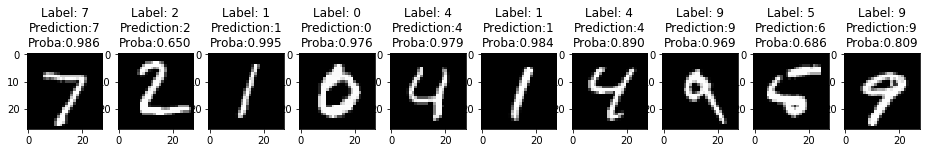

In [0]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
plt.figure(figsize=[16,16])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title("Label: {0}\nPrediction:{1}\nProba:{2:.3f}".format(
        y_test_index[i], y_pred_test_index[i], y_pred_test_proba[i] ))
    plt.imshow(x_test[i].reshape([28,28]),cmap='gray');
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
### END STUDENT CODE ###